## Overview

In this section, we will take the [Gridded Monthly Temperature Anomaly Data](https://data.giss.nasa.gov/gistemp/) from 1880-present from GISTEMP and visualize the temperature anomaly for the year 2021.

## Setup and Data Download

The following blocks of code will install the required packages and download the datasets to your Colab environment.

In [ ]:
%%capture
if 'google.colab' in str(get_ipython()):
  !apt-get -qq remove python-shapely python3-shapely
  !pip install --no-binary shapely shapely --force
  !pip install --no-binary cartopy cartopy==0.19.0.post1

In [4]:
import cartopy
import cartopy.crs as ccrs
import os
import matplotlib.pyplot as plt
import xarray as xr

In [5]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [6]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

filename = 'gistemp1200_GHCNv4_ERSSTv5.nc'
data_url = 'https://github.com/spatialthoughts/python-dataviz-web/raw/main/data/gistemp/'

download(data_url + filename)

## Data Pre-Processing

We read the data using `XArray

In [12]:
file_path = os.path.join(data_folder, filename)
ds = xr.open_dataset(file_path)
ds

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1704, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2021-12-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2022-01-11 09:09:58 by SBBX_to_nc 2.0 - ILAND=1200,...

Select the `tempanomaly` variable and aggregate it to yearly anoamalies :

In [13]:
da = ds.tempanomaly
da

<xarray.DataArray 'tempanomaly' (time: 1704, lat: 90, lon: 180)>
[27604800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time     (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2021-12-15
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

In [16]:
yearly = da.groupby('time.year').mean(dim='time')
yearly

<xarray.DataArray 'tempanomaly' (year: 142, lat: 90, lon: 180)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 3.7966664 ,  3.7966664 ,  3.7966664 , ...,  3.7966664 ,
          3.7966664 ,  3.7966664 ],
        [ 3.7966664 ,  3.7966664 ,  3.7966664 , ...,  3.7966664 ,
          3.7966664 ,  3.7966664 ],
        [ 3.7966664 ,  3.7966664 ,  3.7966664 , ...,  3.7966664 ,
          3.7966664 ,  3.7966664 ]],

       [[-1.0675001 , -1.0675001 , -1.0675001 , ..., -1.0675001 ,
         -1.0675001 , -1.0675001 ],
        [-1.0675001 , -1.0675001 , -1.0675001 , ..., -1.0675001 ,
         -1.0675001 , -1.0675001 ],
        [-1.0675001 , -1.0675001 , -1.0675001 , ..., -1.0675001 ,
         -1.0675001 , -1.0675001 ],
        ...,
        [ 3.7291667 ,  3.7291667 ,  3.7291667 , ...,  3.7291667 ,
          3.7291667 ,  3.7291667 ],
        [ 3.7291667 ,  3.7291667 ,  3.7291667 , ...,  3.7291667 ,
          3.7291667 ,  3.7291667 ],
        [ 3.7291667 ,  3.7291667 ,  3.7291667 , ...,  3.7291667 ,
          3.7291667 ,  3.7291667 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * year     (year) int64 1880 1881 1882 1883 1884 ... 2017 2018 2019 2020 2021
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

## Plotting using Matplotlib

XArray provides a `plot()` method based on Matplotlib. When you call `plot()` on a 2D DataArray, it uses the `xarray.plot.pcolormesh()` function that creates a Pseudocolor plot.

Reference: [xarray.plot](https://docs.xarray.dev/en/stable/user-guide/plotting.html#two-dimensions)


In [17]:
anomaly2021 = yearly.sel(year=2021)
anomaly2021

<xarray.DataArray 'tempanomaly' (lat: 90, lon: 180)>
array([[-1.0675001, -1.0675001, -1.0675001, ..., -1.0675001, -1.0675001,
        -1.0675001],
       [-1.0675001, -1.0675001, -1.0675001, ..., -1.0675001, -1.0675001,
        -1.0675001],
       [-1.0675001, -1.0675001, -1.0675001, ..., -1.0675001, -1.0675001,
        -1.0675001],
       ...,
       [ 3.7291667,  3.7291667,  3.7291667, ...,  3.7291667,  3.7291667,
         3.7291667],
       [ 3.7291667,  3.7291667,  3.7291667, ...,  3.7291667,  3.7291667,
         3.7291667],
       [ 3.7291667,  3.7291667,  3.7291667, ...,  3.7291667,  3.7291667,
         3.7291667]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
    year     int64 2021
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)
anomaly2021.plot(ax=ax)
plt.show()

While the `plot()` method works, it is slower than the `plot.imshow()` method when rendering large 2D-arrays. So we would prefer using it instead of the `plot()` method.

Reference : [xarray.plot.imshow ](https://docs.xarray.dev/en/stable/generated/xarray.plot.imshow.html)

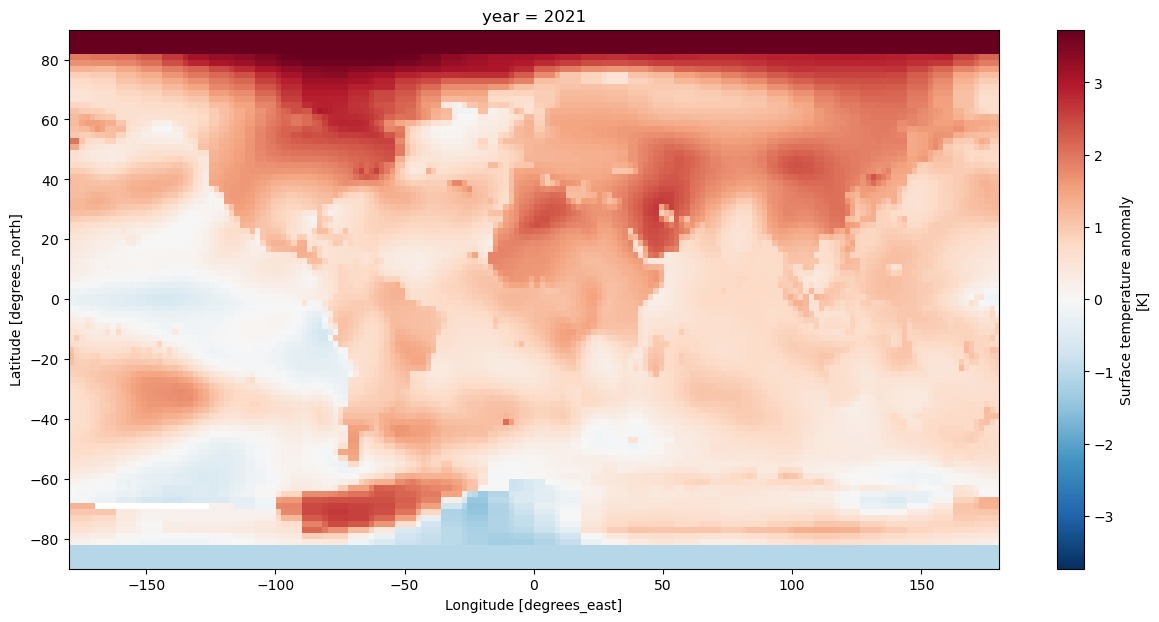

In [18]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)
anomaly2021.plot.imshow(ax=ax)
plt.show()

We can customize the plot using Matplotlib's options.

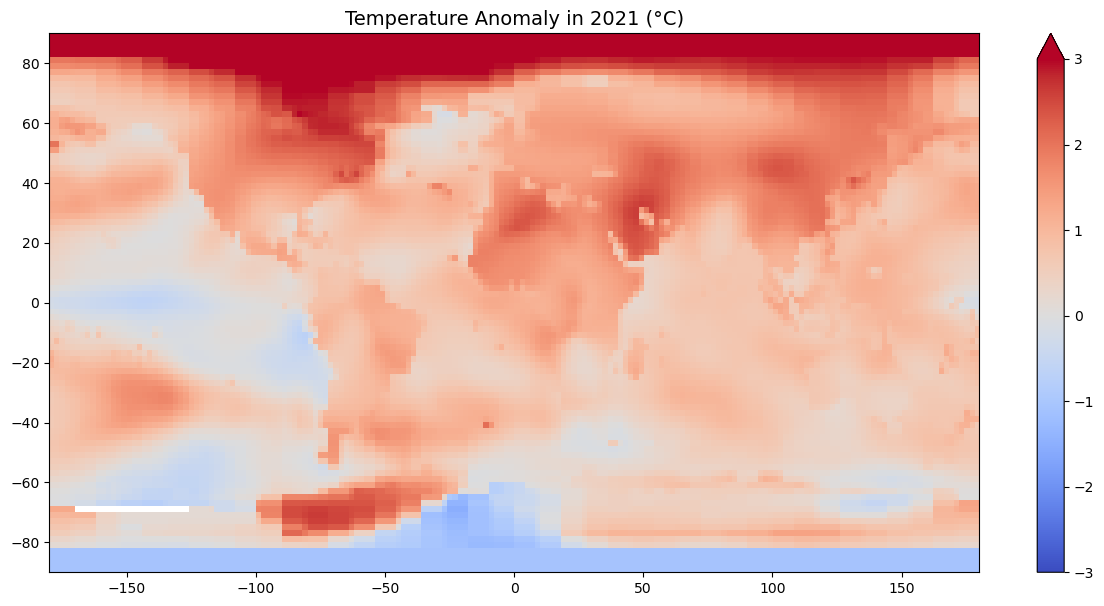

In [19]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)

anomaly2021.plot.imshow(ax=ax,
    vmin=-3, vmax=3, add_labels=False, cmap='coolwarm') # clip the color bar

ax.set_title('Temperature Anomaly in 2021 (°C)', fontsize = 14)

plt.show()

## Plotting using CartoPy

To create more informative map visualization, we need to reproject this grid to another projection. CartoPy supports a wide range of projections and can plot them using matplotlib. CartoPy creates a GeoAxes object and replaces the default Axes with it. This allows you to plot the data on a specified projection.

We start as usual by creating a subplot but specify an additional argument to set the CRS from CartoPy.

Reference: [CartoPy List of Projections](https://scitools.org.uk/cartopy/docs/latest/reference/crs.html?highlight=list#list-of-projections)

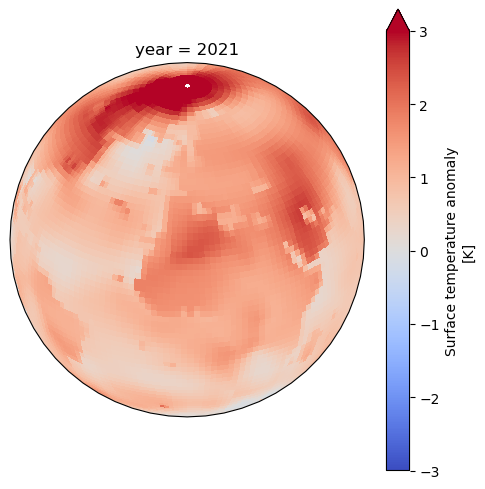

In [20]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.Orthographic(0, 30)}) # central_longitude = 0, central_latitude = 30
fig.set_size_inches(5,5)

anomaly2021.plot.imshow(ax=ax,
    vmin=-3, vmax=3, cmap='coolwarm', # clip colorbar
    transform=ccrs.PlateCarree())

plt.tight_layout()
plt.show()

We can further customize the map by adjusting the colorbar.

Reference: [matplotlib.pyplot.colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html)

/home/stephen137/mambaforge/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


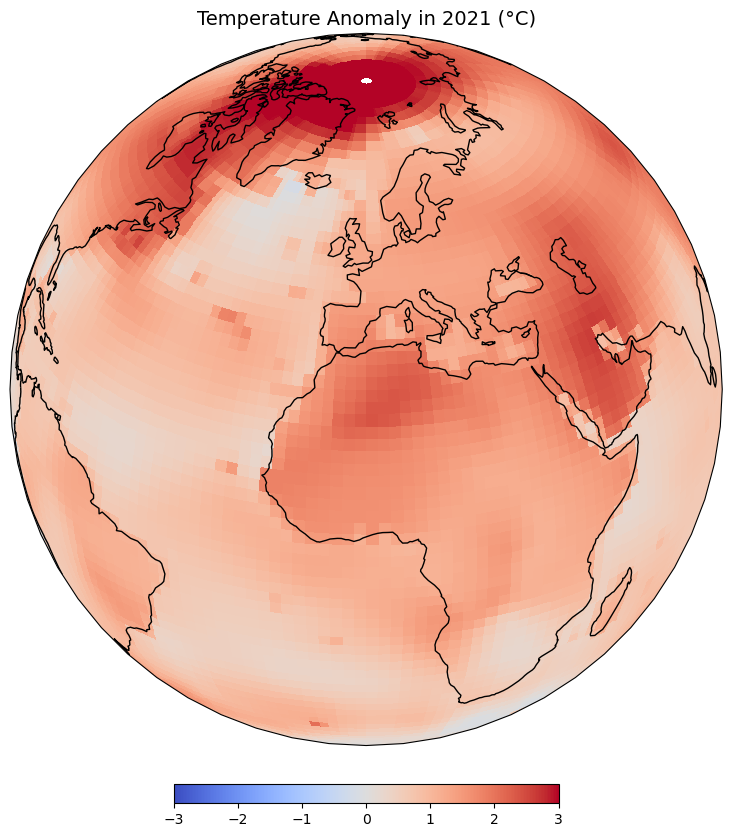

In [21]:
# customize colorbar
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.025,
    'pad': 0.05,
    'extend':'neither'
}

# tee up our plotting grid
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.Orthographic(0, 30)})
fig.set_size_inches(10, 10)

# plot 2021 anomalies
anomaly2021.plot.imshow(
    ax=ax,
    vmin=-3, vmax=3, cmap='coolwarm',
    transform=ccrs.PlateCarree(),
    add_labels=False,
    cbar_kwargs=cbar_kwargs)

ax.coastlines()
plt.title('Temperature Anomaly in 2021 (°C)', fontsize = 14)

output_folder = 'output'
output_path = os.path.join(output_folder, 'anomaly.jpg')
plt.savefig(output_path, dpi=300)
plt.show()

## Exercise

Display the map in the Robinson projection.

## My Solution

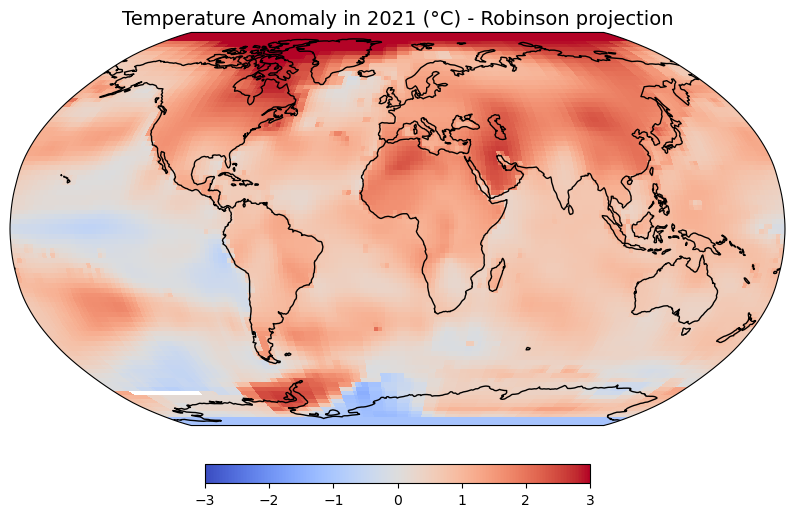

In [24]:
# customize colorbar
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.025,
    'pad': 0.05,
    'extend':'neither'
}

# tee up our plotting grid
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.Robinson(0)})
fig.set_size_inches(10, 10)

# plot 2021 anomalies
anomaly2021.plot.imshow(
    ax=ax,
    vmin=-3, vmax=3, cmap='coolwarm',
    transform=ccrs.PlateCarree(),
    add_labels=False,
    cbar_kwargs=cbar_kwargs)

ax.coastlines()
plt.title('Temperature Anomaly in 2021 (°C) - Robinson projection', fontsize = 14)

plt.show()